> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset - The Movie Data Base - TMDB 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and 

revenue. The advantages of TMDB is that: 

They're international. While they officially support 39 languages we also have extensive regional data. Every single day TMDB 

is used in over 180 countries, their community is second to none. Between our staff and community moderators, they're always 

here to help. they're passionate about making sure your experience on TMDB is nothing short of amazing. also, Trusted platform. 

Every single day their service is used by millions of people while they process over 3 billion requests. they've proven for 

years that this is a service that can be trusted and relied on.


### Dataset Description 

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected/downloaded for analysis. Read through the description available on the homepage-links present [here](https://docs.google.com/document/d/e/2PACX-1vTlVmknRRnfy_4eTrjw5hYGaiQim5ctr9naaRd4V9du2B5bxpd8FEH3KtDgp8qVekw7Cj1GLk1IXdZi/pub?embedded=True).

List all column names in each table, and their significance. In case of multiple tables, describe the relationship between 

tables. Certain columns, like ‘cast’and ‘genres’, contain multiple values separated by pipe (|) characters. There are some odd 

charactersin the ‘cast’ column. The final two columns ending with  “_adj” show the budget and revenue of the associated movie.

### Question(s) for Analysis
>**Tip**: Clearly state one or more questions that you plan on exploring over the course of the report. You will address these questions in the **data analysis** and **conclusion** sections. Try to build your report around the analysis of at least one dependent variable and three independent variables. If you're not sure what questions to ask, then make sure you familiarize yourself with the dataset, its variables and the dataset context for ideas of what to explore.

1-  What is the relatioship between the budget of the movies and the income?

.... what is the movie with highest budget and revenue?

..... what is the movie with the lowest budget and revenue?

2- What is relationship between the profit of each production company and the popularity of released movies

.... what is the company with the highest profit?

.....what is the company with the lowest profit?
> **Tip**: Once you start coding, use NumPy arrays, Pandas Series, and DataFrames where appropriate rather than Python lists and dictionaries. Also, **use good coding practices**, such as, define and use functions to avoid repetitive code. Use appropriate comments within the code cells, explanation in the mark-down cells, and meaningful variable names. 

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
%matplotlib inline

In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### General Properties
> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

1- Load the data and display it in a table.

In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df_tmdb = pd.read_csv(r'/home/workspace/Database_TMDb_movie_data/tmdb-movies.csv')
df_tmdb.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


... After displaying TMDB data, I found many of the data are missing, and some of them need to be reshaped as ( Cast names, genres of movies, and production companies ), also the release date of movies need to be reformated, and finally, there are two columns are repeated as ( budget and revenue), so in next operation, I will modify the data to be well used in the following statistics.

2- Display the information of the data (type, no.columns and non-null data)

In [4]:
df_tmdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

3- Extract the null values and create a list for each variable.

In [5]:
print('Total Null Values: {}\n'.format(df_tmdb.isnull().sum().sum()))
list(df_tmdb.isna().sum().items())

Total Null Values: 13434



[('id', 0),
 ('imdb_id', 10),
 ('popularity', 0),
 ('budget', 0),
 ('revenue', 0),
 ('original_title', 0),
 ('cast', 76),
 ('homepage', 7930),
 ('director', 44),
 ('tagline', 2824),
 ('keywords', 1493),
 ('overview', 4),
 ('runtime', 0),
 ('genres', 23),
 ('production_companies', 1030),
 ('release_date', 0),
 ('vote_count', 0),
 ('vote_average', 0),
 ('release_year', 0),
 ('budget_adj', 0),
 ('revenue_adj', 0)]

5- Display some statistics for the whole data

In [6]:
df_tmdb.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09



### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
 

... After doing some operation to identify the data as its shape and also refill the null values and the descriptions of data, now I'm going modify the data by dropping the useless duplicates and throwing away some of the data which wouldn't be helpful in my statistics and reform some of the columns to be easier to deal with.

1- Total no. of duplicates in the data 

In [7]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
print("Num of dublicates in the data : ", + df_tmdb.duplicated().sum())

Num of dublicates in the data :  1


2- drop duplicates

In [8]:
df_tmdb.drop_duplicates(inplace=True)

3- Drop useless data for better future interpretation 

In [9]:
df_tmdb.drop(['imdb_id','homepage','tagline','overview','keywords','budget_adj','revenue_adj'],axis =1,inplace = True)

4- Fill the null values with zero

In [10]:
df_tmdb.fillna(0)
print()

5- Change the  date format of (realese_data), convert the type of data as (object) to (string) and but the data in a list better than separate them by (|), also generate a new column is called the profit from substract revenue and budget

In [11]:
df_tmdb['release_date'] = pd.to_datetime(df_tmdb['release_date'])
                                         
df_tmdb['cast'] = df_tmdb['cast'].astype(str)
df_tmdb['cast'] = df_tmdb['cast'].str.split('|')
df_tmdb['genres'] = df_tmdb['genres'].astype(str)
df_tmdb['genres'] = df_tmdb['genres'].str.split('|')
df_tmdb['production_companies'] = df_tmdb['production_companies'].astype(str)
df_tmdb['production_companies'] = df_tmdb['production_companies'].str.split('|')
df_tmdb['profit'] = df_tmdb['revenue']-df_tmdb['budget']
df_tmdb.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,profit
0,135397,32.985763,150000000,1513528810,Jurassic World,"[Chris Pratt, Bryce Dallas Howard, Irrfan Khan...",Colin Trevorrow,124,"[Action, Adventure, Science Fiction, Thriller]","[Universal Studios, Amblin Entertainment, Lege...",2015-06-09,5562,6.5,2015,1363528810
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,"[Tom Hardy, Charlize Theron, Hugh Keays-Byrne,...",George Miller,120,"[Action, Adventure, Science Fiction, Thriller]","[Village Roadshow Pictures, Kennedy Miller Pro...",2015-05-13,6185,7.1,2015,228436354
2,262500,13.112507,110000000,295238201,Insurgent,"[Shailene Woodley, Theo James, Kate Winslet, A...",Robert Schwentke,119,"[Adventure, Science Fiction, Thriller]","[Summit Entertainment, Mandeville Films, Red W...",2015-03-18,2480,6.3,2015,185238201
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,"[Harrison Ford, Mark Hamill, Carrie Fisher, Ad...",J.J. Abrams,136,"[Action, Adventure, Science Fiction, Fantasy]","[Lucasfilm, Truenorth Productions, Bad Robot]",2015-12-15,5292,7.5,2015,1868178225
4,168259,9.335014,190000000,1506249360,Furious 7,"[Vin Diesel, Paul Walker, Jason Statham, Miche...",James Wan,137,"[Action, Crime, Thriller]","[Universal Pictures, Original Film, Media Righ...",2015-04-01,2947,7.3,2015,1316249360


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. 



> **Tip**: - Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.


### Research Question 1 ( What is the  relatioship between the budget of the movies  and the income )

1- Scatter plot between two variables.

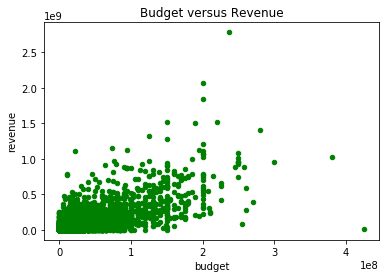

In [12]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
df_tmdb.plot(x='budget',y='revenue',kind='scatter',color = 'green')
plt.title('Budget versus Revenue')
plt.show()

... For the first plot, I want to know if the both data have a positve relation or not to correlate between the both variables
then I will display the budget of the movies and their revenue by the first five movies in the data. 

2- Bar plot for the budget of five movies

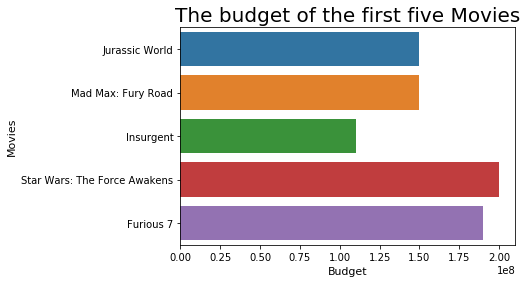

In [13]:
info = pd.DataFrame(df_tmdb['budget'])
info['original_title'] = df_tmdb['original_title']
movies = list(map(str,(info['original_title'])))
x = list(movies[:5])
y = list(info['budget'][:5])
ax= sns.barplot(x=y,y=x)
sns.set(rc={'figure.figsize':(10,5)})
ax.set_title("The budget of the first five Movies",fontsize = 20)
ax.set_xlabel("Budget",fontsize = 11)
ax.set_ylabel("Movies",fontsize = 11)

sns.set_style("whitegrid")

3- Bar plot for the evenue of five movies

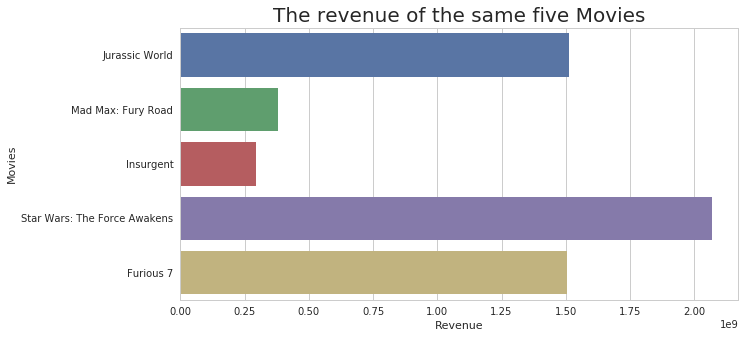

In [14]:
info = pd.DataFrame(df_tmdb['revenue'])
info['original_title'] = df_tmdb['original_title']
movies = list(map(str,(info['original_title'])))
x = list(movies[:5])
y = list(info['revenue'][:5])
ax= sns.barplot(x=y,y=x)
sns.set(rc={'figure.figsize':(10,5)})
ax.set_title("The revenue of the same five Movies",fontsize = 20)
ax.set_xlabel("Revenue",fontsize = 11)
ax.set_ylabel("Movies",fontsize = 11)

sns.set_style("whitegrid")

... The statistics are proved that Jurassic world and star Wars: The Force Awakens have been succeeded, but the others look have been failed and proved also, the positvie relationship.

### Research Question 2  (What is relationship  between the profit of each production company and the popularity of released movies)

... To do the next statistics, at first I have to modify the production_companies column by generating a new column for the specific company which has released its movie, finally drop the other messy rest data.

In [15]:
df_com = df_tmdb.production_companies.apply(pd.Series)
df_com =df_tmdb.merge(df_com, left_index=True, right_index = True)
df_com=df_com.melt(id_vars =['id','popularity','budget','revenue','original_title','cast','director','runtime','genres','production_companies','release_date','vote_count','vote_average','release_year','profit'],value_name="companies")
df_com.drop(['production_companies','variable'],axis=1,inplace=True)
df_com.dropna(inplace=True)


... Then I'm going to generate a new column form existed columns to put it into a relation with the production companies to display their profit.

1- Scatter plot between two variables

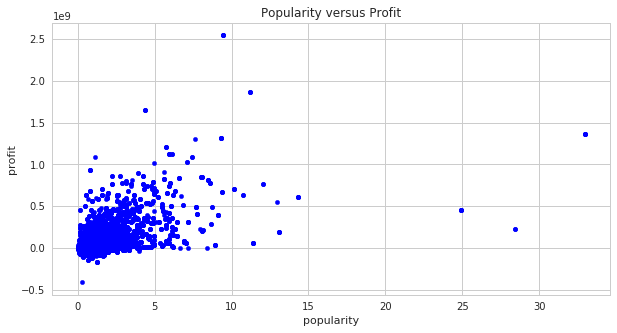

In [16]:
df_com.plot(x='popularity',y='profit',kind='scatter',color = 'blue')
plt.title('Popularity versus Profit')
plt.show()

... The plot is already proved the previous statistics that the relationship between the budget and the revenue with the companies which owned the movies, and the plot is a positve relation.


2- Display the budget and revenue for the first companies

In [17]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
df_com.iloc[:5,[2,3,14]]

,budget,revenue,companies
0,150000000,1513528810,Universal Studios
1,150000000,378436354,Village Roadshow Pictures
2,110000000,295238201,Summit Entertainment
3,200000000,2068178225,Lucasfilm
4,190000000,1506249360,Universal Pictures


3- point plot between two variables

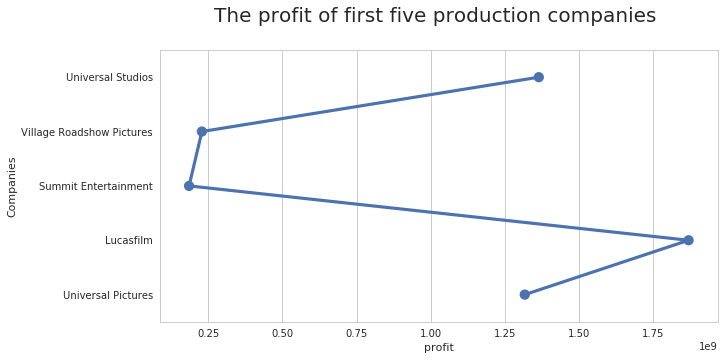

In [18]:
info = pd.DataFrame(df_com['profit'])
info['companies'] = df_com['companies']
com = list(map(str,(info['companies'])))
x = list(com[:5])
y = list(info['profit'][:5])
ax= sns.pointplot(x=y,y=x,)
sns.set(rc={'figure.figsize':(10,5)})
ax.set_title("The profit of first five production companies \n",fontsize=20)
ax.set_xlabel("profit",fontsize=11)
ax.set_ylabel("Companies",fontsize=11)

sns.set_style("whitegrid")

... Now the point plot displays the first five movies and the profit of the production companies.


# <a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed in relation to the question(s) provided at the beginning of the analysis. Summarize the results accurately, and point out where additional research can be done or where additional information could be useful.

In the displayed data:


1- Star Wars: The Force Awakens is the highest profit and the highest budget.

2- Insurgent is the lowest profit and lowest budget.

3- Movie with high popularity may earn high income.

4- Acorrdinaly, Lucasfilm production company has been earned the biggest profit.

5- Summit Entertainment production company has been earned the lowest profit.

> **Tip**: If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

### Limitations
> **Tip**: Make sure that you are clear with regards to the limitations of your exploration. You should have at least 1 limitation explained clearly. 

... Maybe the data isn't updated or maybe some information isn't realistic. Also, the numeric data of budget and revenue and 

consequently, the calculated profit column do not have their currency unit. There are columns that need to be reformatted to do 

the best data cleaning.

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.

## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [19]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0